## 第２章 数値計算の基礎

In [1]:
# ベクトル
a = [1, 2, 3]
a

3-element Vector{Int64}:
 1
 2
 3

In [2]:
b = [4, 5, 6]
a + b

3-element Vector{Int64}:
 5
 7
 9

In [3]:
sum(a .* b)

32

In [4]:
a' * b

32

In [8]:
# 行列
A = [1 2 3;
     4 5 6;
     7 8 9]
    
B = [1 2 3;
     4 5 6;
     7 8 9]

A * B

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

In [9]:
M = size(A, 1)
N = size(B, 2)

C = [sum(A[i, :] .* B[:, j]) for i in 1:M, j in 1:N]

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

In [11]:
I = [1 0 0;
     0 1 0;
     0 0 1]

A * I

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [12]:
A'

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4  7
 2  5  8
 3  6  9

In [15]:
# 連立方程式
A = Rational{Int}[1 2;
                   4 5 ]
sol = inv(A) * [-1, 1]

2-element Vector{Rational{Int64}}:
  7//3
 -5//3

In [ ]:
# 微分計算
f(x) = -(x + 1)*(x - 1)
h = 1.0e-10

f'(a) = (f(a + h) - f(a)) / h

xs = range(-1, 1, length=100)

fig, axes = subplots(1, 2, figsize=(12, 4))

## 2.2 統計量の計算

In [7]:
using Statistics
using Distributions

In [2]:
X = rand(5)
Y = rand(2, 5)

2×5 Matrix{Float64}:
 0.130302  0.87523   0.730097  0.152396  0.916288
 0.273304  0.159871  0.496708  0.585494  0.0195229

In [3]:
println(sum(X))
println(mean(X))

3.898139715416987
0.7796279430833974


In [4]:
println(std(X))
println(std(X).^2)
println(var(X))

0.12285692056830391
0.015093822931526536
0.015093822931526538


In [5]:
# 共分散
cov(Y, dims=1)

5×5 Matrix{Float64}:
  0.0102248  -0.0511489  -0.0166876   0.030967   -0.0641197
 -0.0511489   0.255869    0.0834784  -0.15491     0.320754
 -0.0166876   0.0834784   0.0272352  -0.0505401   0.104648
  0.030967   -0.15491    -0.0505401   0.0937868  -0.194193
 -0.0641197   0.320754    0.104648   -0.194193    0.402094

In [6]:
cov(Y, dims=2)

2×2 Matrix{Float64}:
  0.151505   -0.0538929
 -0.0538929   0.0547433

In [8]:
μ = 1.5
σ = 2.0
Z = rand(Normal(μ, σ), 10000)
Z

10000-element Vector{Float64}:
 -0.3105723892391812
 -2.3878961357499007
  3.0091304577688605
 -3.124042666423727
  0.5048427211837063
  2.186772745945721
  0.8258112850595689
  2.8294144980783096
  1.8421698816262484
  4.135293494779564
  ⋮
  0.9628918656940914
 -1.7559831875834844
  1.2216052816044813
  5.336120442694704
  1.4827151021675056
 -0.06931464297993828
  6.793020937679317
  3.426076214752195
 -0.4270869931437393

In [9]:
println(mean(Z))
println(std(Z))

1.5000061695993274
1.9900364455451898


## 2.4　微分計算

### 2.4.1 1変数関数の微分

In [46]:
using Plots, GR
gr()

Plots.GRBackend()

In [13]:
f(x) = -(x + 1)*(x - 1)
h = 1.0e-10
f_prime(a) = (f(a + h) - f(a)) / h

f_prime (generic function with 1 method)

In [14]:
xs = range(-1, 1, length=100)

-1.0:0.020202020202020204:1.0

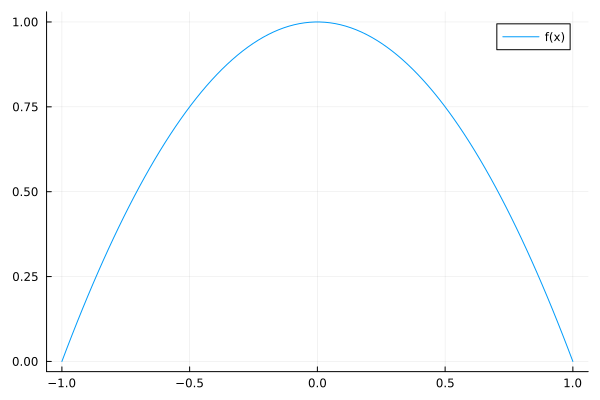

In [17]:
Plots.plot(xs, f.(xs), label="f(x)")

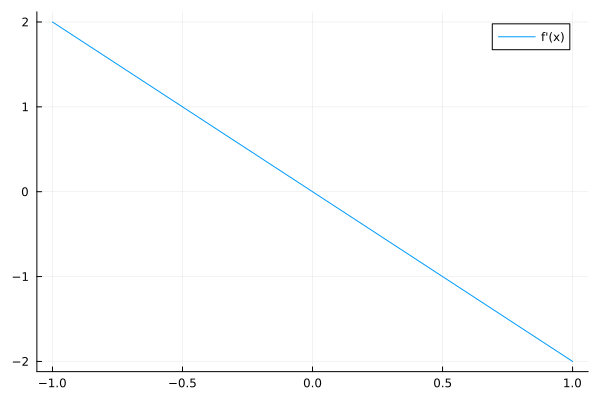

In [21]:
# 導関数をプロット
Plots.plot(xs, f_prime.(xs), label="f'(x)")

## 2.4.2 多変数関数の微分
偏微分をベクトルとして組み合わせたものを **勾配(gradient)** と呼ばれる。
これは点($x_1,x_2$)において関数の値がユークリッド距離で最も増加する方向を示している

In [64]:
using PyPlot

In [23]:
L = 10

xs1 = range(-1, 1, length=L)
xs2 = range(-1, 1, length=L)

-1.0:0.2222222222222222:1.0

In [24]:
f2(x) = -(x .+ 1)'*(x .- 1)

f2 (generic function with 1 method)

In [25]:
grad_f2(x) = -2x

grad_f2 (generic function with 1 method)

### 2.4.3 自動微分

In [32]:
using ForwardDiff

In [27]:
f(x) = -(x + 1)*(x - 1)
f_prime(x) = ForwardDiff.derivative(f, x)

f_prime (generic function with 1 method)

In [28]:
xs = range(-1, 1, length=100)

-1.0:0.020202020202020204:1.0

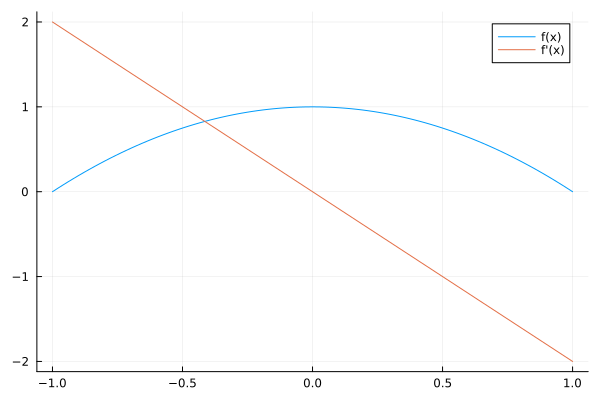

In [29]:
Plots.plot(xs, f.(xs), label="f(x)")
Plots.plot!(xs, f_prime.(xs), label="f'(x)")

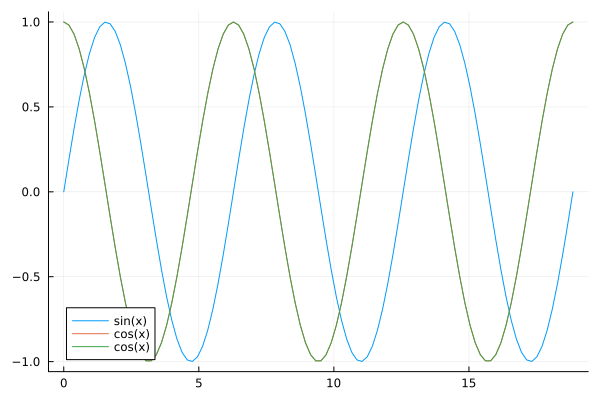

In [30]:
# sin関数
xs = range(0, 2pi*3, length=100)
Plots.plot(xs, sin.(xs), label="sin(x)")
Plots.plot!(xs, cos.(xs), label="cos(x)")
# sin関数の導関数
Plots.plot!(xs, cos.(xs), label="cos(x)")

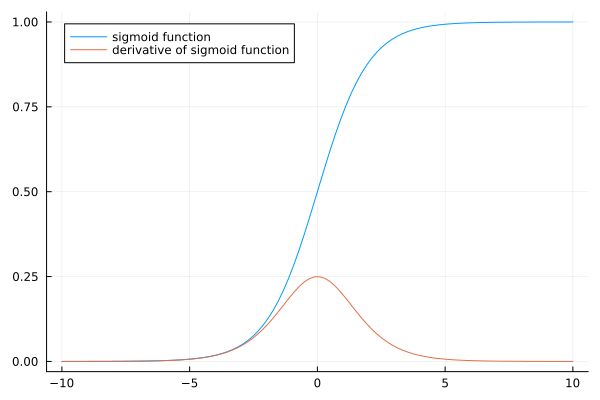

In [35]:
# シグモイド関数
f(x) = 1 / (1 + exp(-x))

xs = range(-10, 10, length=100)

Plots.plot(xs, f.(xs), label="sigmoid function")
Plots.plot!(xs, map(x -> ForwardDiff.derivative(f, x), xs), label="derivative of sigmoid function")

## 2.5 関数の最適化
**最適化** ：目的関数の最大値およびその時の$x$を求める問題。最小値ならば$-f(x)$を最大化する問題と考える

### 2.5.1 1変数関数の勾配法
**勾配法** : 単純な山登りの戦略を取る最適化手法。現在の立ち位置において周りを見て、一番高度が高くなる場所に一歩進むのを繰り返す。

In [57]:
x_opt = 0.5
f(x) = -2(x - x_opt)^2

f (generic function with 1 method)

In [58]:
xs = range(-3.0, 3.0, length=100)
Plots.plot(xs, f.(xs), label="f(x)")
Plots.plot!(x_opt, f(x_opt),label="optimal point")

ErrorException: Cannot convert Float64 to series data for plotting

In [60]:
function gradient_method_1dim(f, x_init, η, maxiter)
    x_seq = Array{typeof(x_init), 1}(undef, maxiter)

    f_prime(x) = ForwardDiff.derivative(f, x)

    x_seq[1] = x_init

    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η * f_prime(x_seq[i-1])
    end

    x_seq
end

gradient_method_1dim (generic function with 1 method)

In [61]:
x_init = -2.5
maxiter = 20
η = 0.1

x_seq = gradient_method_1dim(f, x_init, η, maxiter)
f_seq = f.(x_seq)

20-element Vector{Float64}:
 -18.0
  -6.479999999999999
  -2.3327999999999993
  -0.8398079999999998
  -0.30233087999999986
  -0.10883911679999994
  -0.03918208204799999
  -0.014105549537279988
  -0.0050779978334207915
  -0.0018280792200314835
  -0.0006581085192113332
  -0.0002369190669160795
  -8.529086408978862e-5
  -3.07047110723239e-5
  -1.1053695986036396e-5
  -3.979330554973165e-6
  -1.4325589997903394e-6
  -5.157212399245448e-7
  -1.8565964637284966e-7
  -6.683747269421776e-8

In [65]:
fig, ax = PyPlot.subplots(figsize=(8, 3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f(x)")
ax.grid()

In [66]:
fig, axes = PyPlot.subplots(1, 2, figsize=(8, 3))

(Figure(PyObject <Figure size 800x300 with 2 Axes>), PyCall.PyObject[PyObject <Axes: >, PyObject <Axes: >])

In [67]:
axes[1].plot(xs, f.(xs))

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2afd8c310>